<a href="https://colab.research.google.com/github/NatashaKamami/Machine-Learning-1/blob/main/Bank_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing libraries and loading the dataset**

In [294]:
# EDA Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [295]:
bank_marketing = pd.read_csv("/content/bank-additional-full.csv", sep=";")
bank_marketing.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


##**EDA**

In [296]:
bank_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [297]:
bank_marketing.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [298]:
bank_marketing = bank_marketing.rename(columns={'y': 'deposit'})

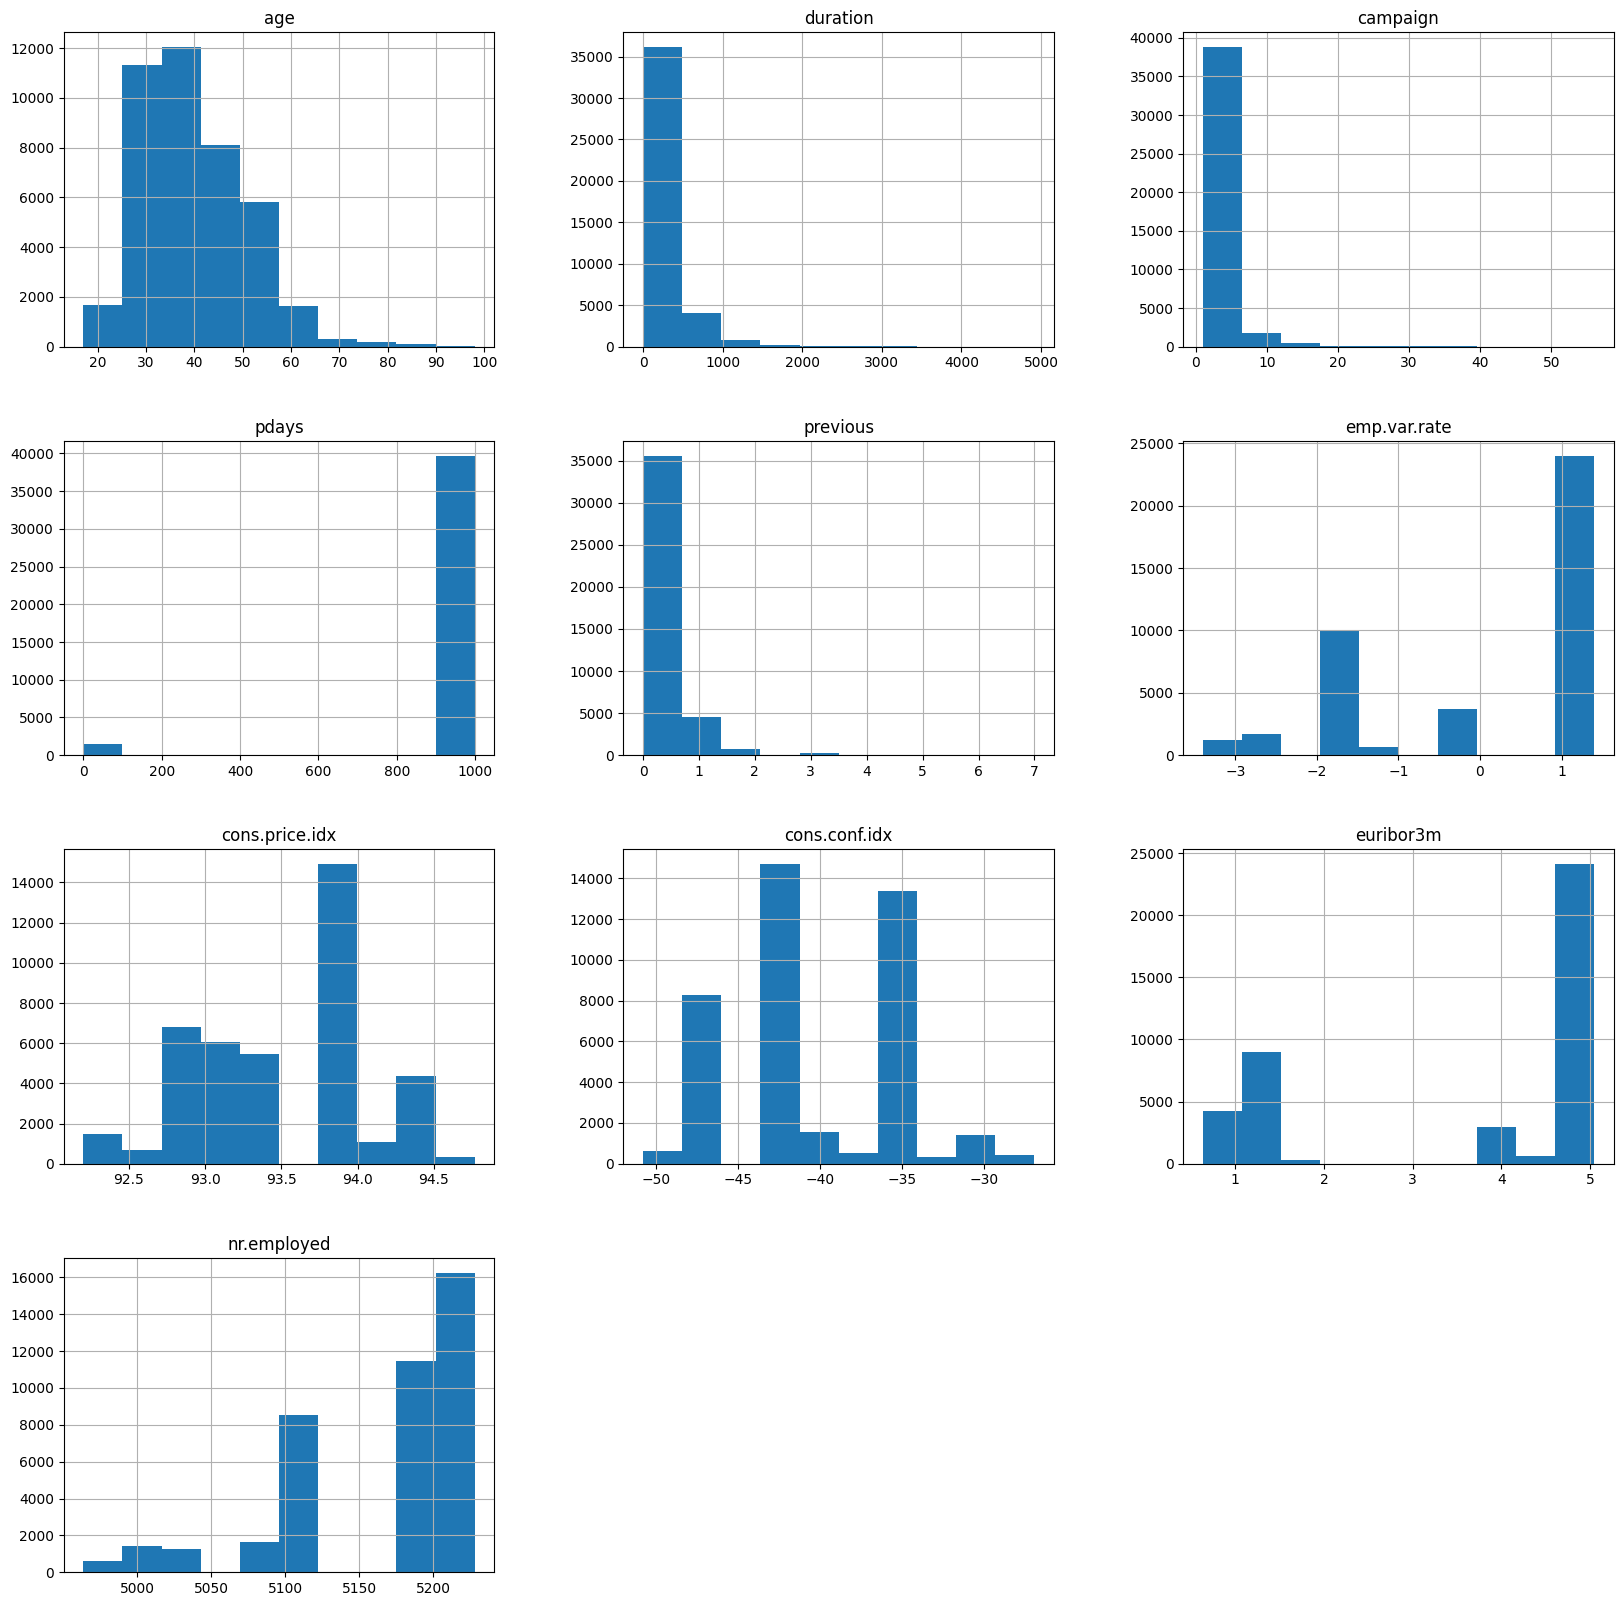

In [299]:
# ploting histograms to visualize distributions for each numeric column
bank_marketing.hist(figsize=(20,20))
plt.show()

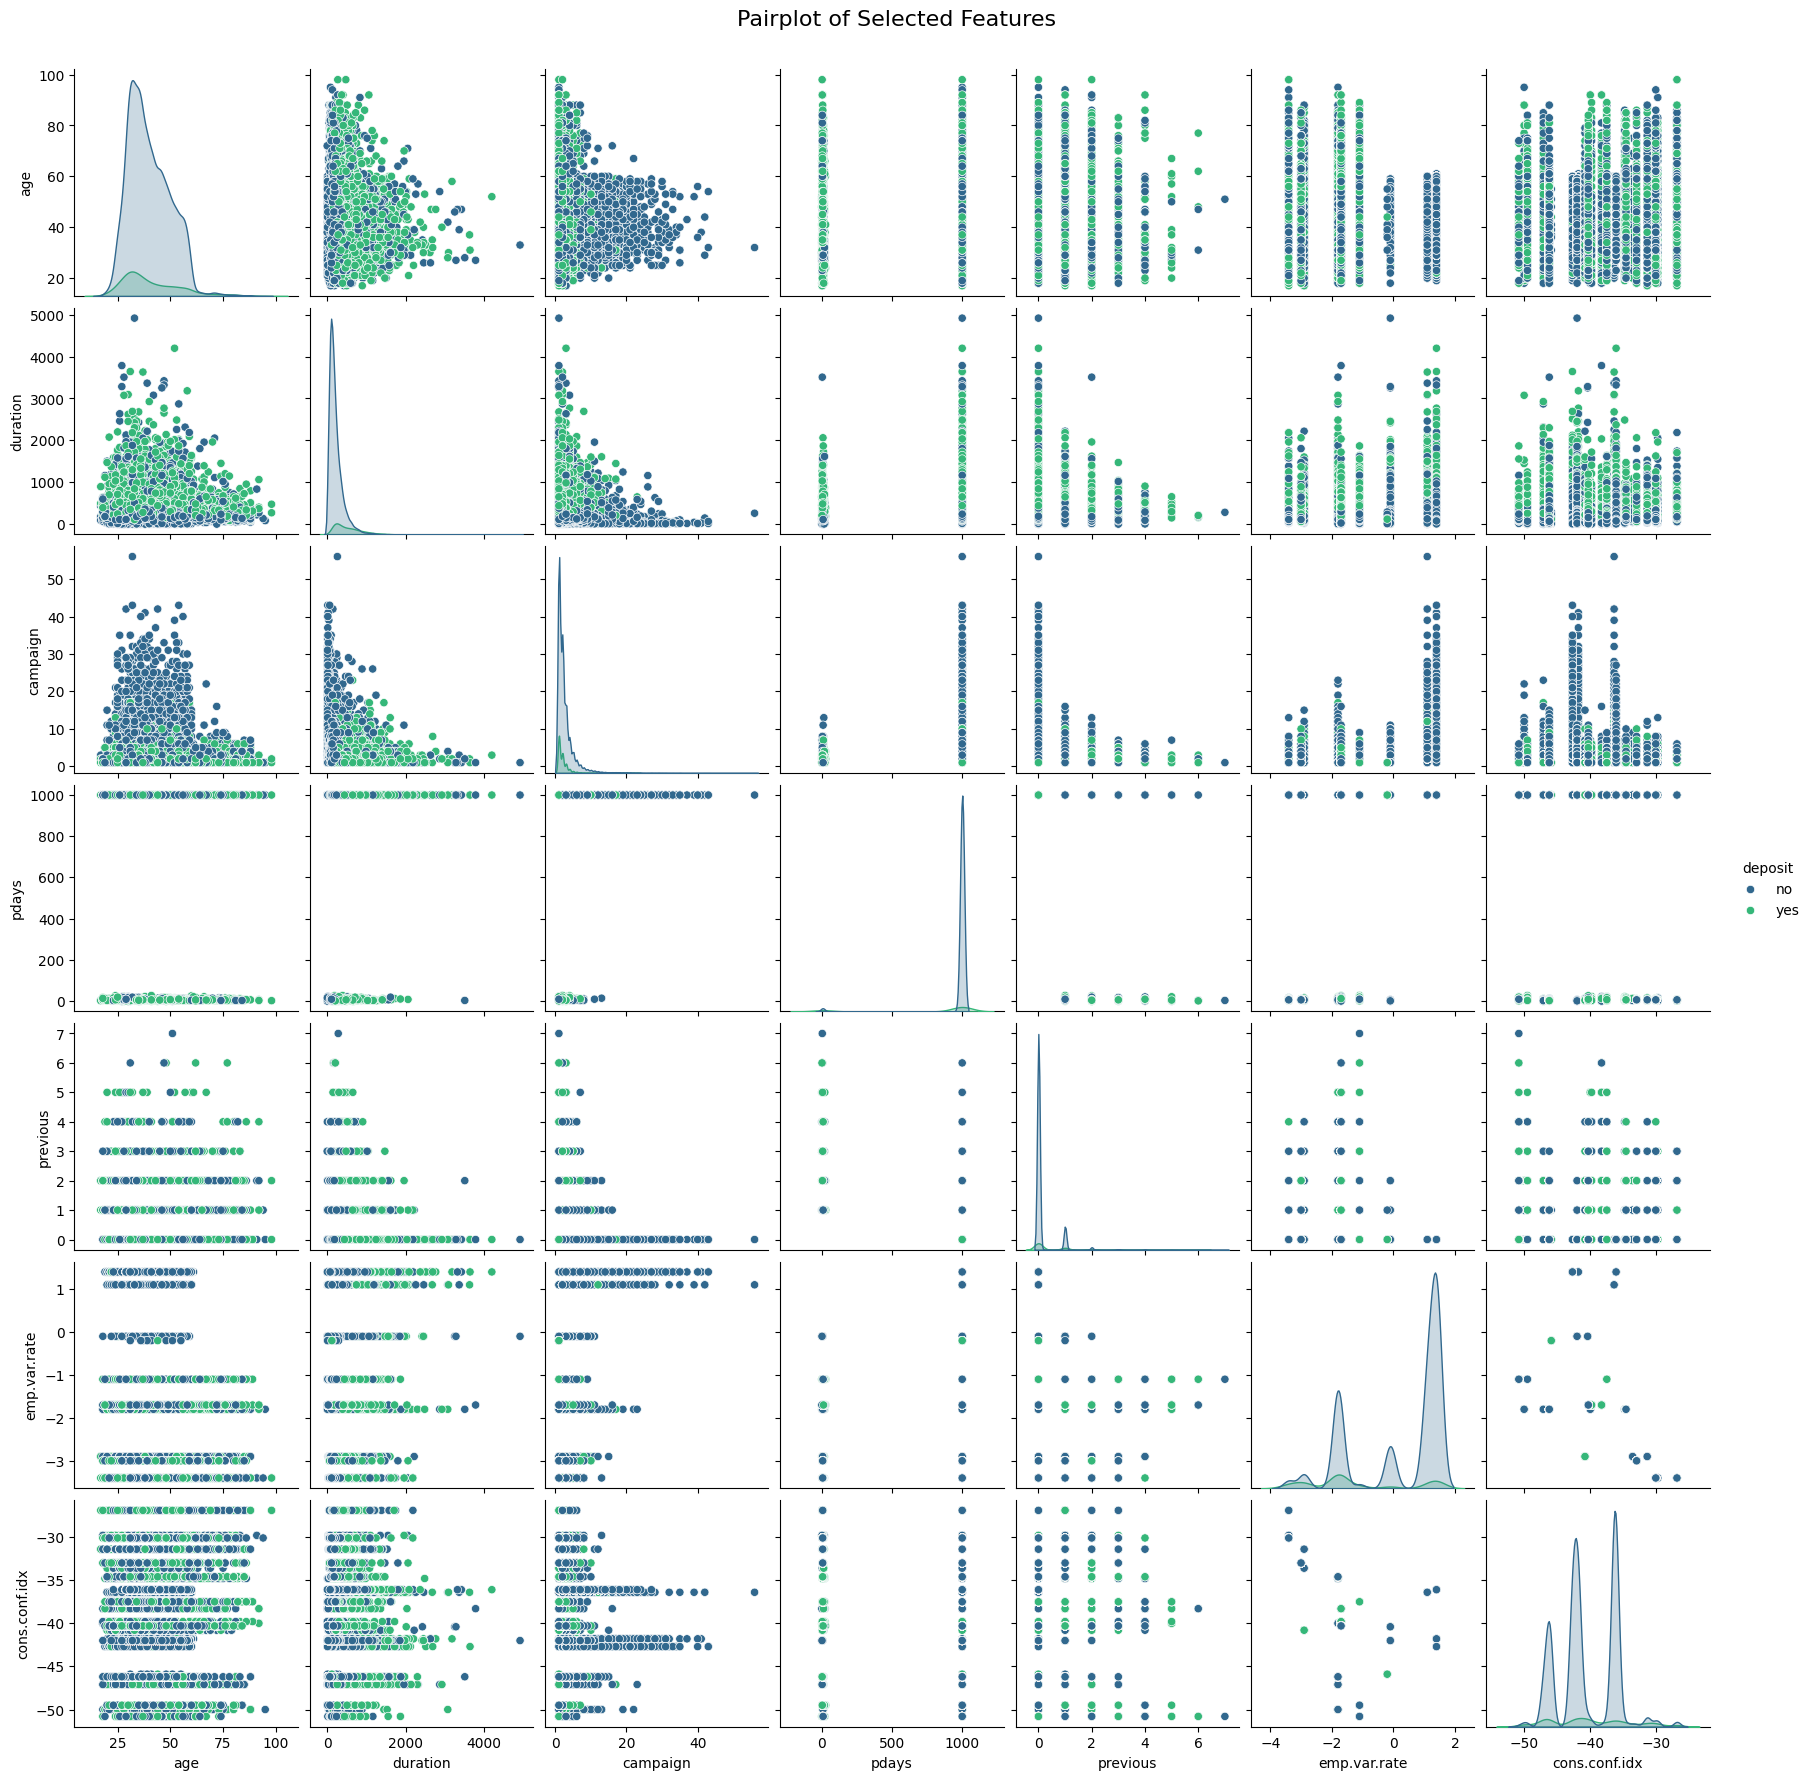

In [300]:
selected_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.conf.idx',]  # Specify the columns you want to plot

# Pairplot for bivariate scatter plot distributions
sns.pairplot(bank_marketing[selected_features + ['deposit']], diag_kind='kde', hue='deposit', palette='viridis')
plt.suptitle("Pairplot of Selected Features", fontsize=16, y=1.02)
plt.show()


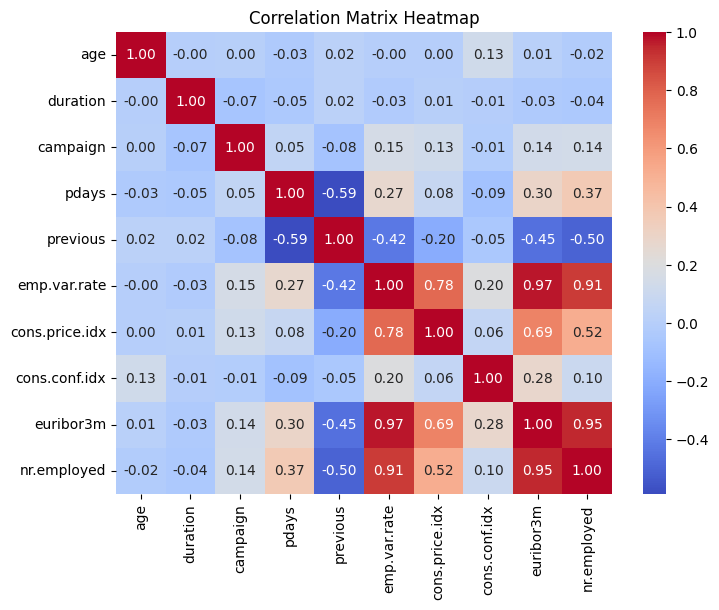

In [301]:
# Compute the correlation matrix only for numeric features
correlation_matrix = bank_marketing.select_dtypes(include=np.number).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

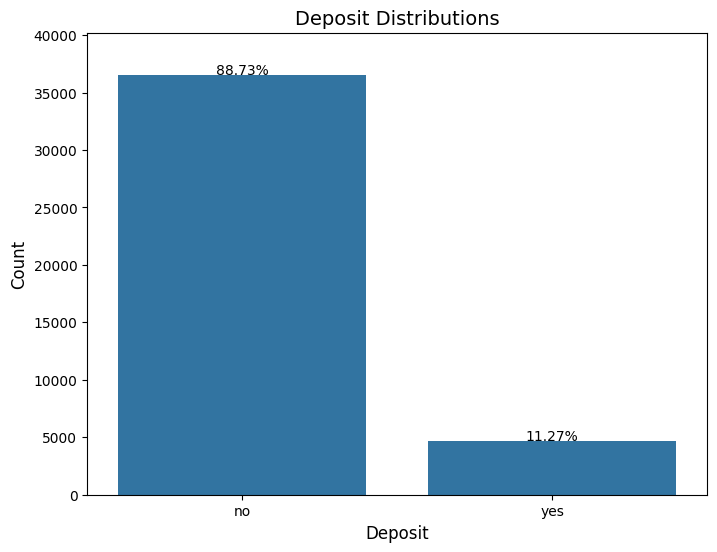

In [302]:
# Calculate percentage proportions for each class
class_counts = bank_marketing['deposit'].value_counts()
class_percentages = (class_counts / len(bank_marketing)) * 100

# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=bank_marketing, x='deposit')

# Add text annotations for percentages
for index, count in enumerate(class_counts):
    percentage = class_percentages[index]
    plt.text(index, count + 50, f"{percentage:.2f}%", ha='center', fontsize=10)

# Update layout for aesthetics
plt.title('Deposit Distributions', fontsize=14)
plt.xlabel('Deposit', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.ylim(0, max(class_counts) * 1.1)  # Add some space for annotations
plt.show()


##**Data Preprocessing**

###**Encoding**

In [303]:
# Encode Yes/No into 1/0 using label encoding since it does not introduce any artificial ordering because there are only two categories
bank_marketing['deposit'] = bank_marketing['deposit'].map({'yes': 1, 'no': 0})

In [304]:
# one-hot encoding for the other categorical columns
data = pd.get_dummies(bank_marketing[['job', 'marital', 'education', 'contact', 'month', 'poutcome', 'day_of_week', 'default', 'housing','loan']], drop_first=True).astype(int)
bank_marketing = pd.concat([bank_marketing, data], axis = 1)
bank_marketing.drop(['job', 'marital', 'education', 'contact', 'month', 'poutcome', 'day_of_week', 'default', 'housing', 'loan'], axis = 1, inplace = True)

###**Feature Scaling**

In [305]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# RobustScaler is less prone to outliers.
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
rbst_scaler = RobustScaler()

bank_marketing['scaled_age'] = std_scaler.fit_transform(bank_marketing['age'].values.reshape(-1,1))
bank_marketing['scaled_emp.var.rate'] = minmax_scaler.fit_transform(bank_marketing['emp.var.rate'].values.reshape(-1,1))
bank_marketing['scaled_cons.price.idx'] = minmax_scaler.fit_transform(bank_marketing['cons.price.idx'].values.reshape(-1,1))
bank_marketing['scaled_cons.conf.idx'] = minmax_scaler.fit_transform(bank_marketing['cons.conf.idx'].values.reshape(-1,1))
bank_marketing['scaled_euribor3m'] = minmax_scaler.fit_transform(bank_marketing['euribor3m'].values.reshape(-1,1))
bank_marketing['scaled_nr.employed'] = minmax_scaler.fit_transform(bank_marketing['nr.employed'].values.reshape(-1,1))
bank_marketing['scaled_duration'] = rbst_scaler.fit_transform(bank_marketing['duration'].values.reshape(-1,1))
bank_marketing['scaled_campaign'] = rbst_scaler.fit_transform(bank_marketing['campaign'].values.reshape(-1,1))
bank_marketing['scaled_pdays'] = rbst_scaler.fit_transform(bank_marketing['pdays'].values.reshape(-1,1))
bank_marketing['scaled_previous'] = rbst_scaler.fit_transform(bank_marketing['previous'].values.reshape(-1,1))


bank_marketing.drop(['age','duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
                     'cons.price.idx', 'cons.conf.idx',	'euribor3m', 'nr.employed'], axis=1, inplace=True)
bank_marketing.head()

,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,scaled_age,scaled_emp.var.rate,scaled_cons.price.idx,scaled_cons.conf.idx,scaled_euribor3m,scaled_nr.employed,scaled_duration,scaled_campaign,scaled_pdays,scaled_previous
0,0,0,0,1,0,0,0,0,0,0,...,1.533034,0.9375,0.698753,0.60251,0.957379,0.859735,0.373272,-0.5,0.0,0.0
1,0,0,0,0,0,0,0,1,0,0,...,1.628993,0.9375,0.698753,0.60251,0.957379,0.859735,-0.142857,-0.5,0.0,0.0
2,0,0,0,0,0,0,0,1,0,0,...,-0.290186,0.9375,0.698753,0.60251,0.957379,0.859735,0.211982,-0.5,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,-0.002309,0.9375,0.698753,0.60251,0.957379,0.859735,-0.133641,-0.5,0.0,0.0
4,0,0,0,0,0,0,0,1,0,0,...,1.533034,0.9375,0.698753,0.60251,0.957379,0.859735,0.585253,-0.5,0.0,0.0


###**Handling imbalanced data**

In [306]:
# Splitting into target and feature variables
X = bank_marketing.drop('deposit',axis=1)
y = bank_marketing['deposit']

In [307]:
# Classification Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
import xgboost as xgb
from xgboost import XGBClassifier

In [308]:
# Splitting the resampled data into a training set, a validation set and a testing set
# Step 1: Split into training and validation+test  sets
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.4, random_state=42)

# Step 2: Split training+validation set into training and validation sets
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)# validation set is 20%

# Print the sizes of each set
print("Train Set:", X_train.shape, y_train.shape)
print("Validation Set:", X_val.shape, y_val.shape)
print("Test Set:", X_test.shape, y_test.shape)


Train Set: (24712, 53) (24712,)
Validation Set: (8238, 53) (8238,)
Test Set: (8238, 53) (8238,)


(43850, 53) (43850,)


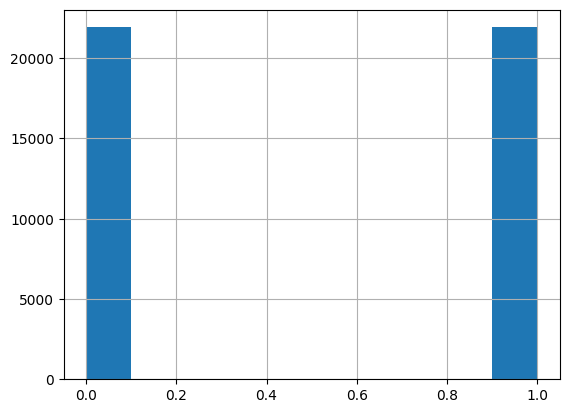

In [309]:
from imblearn.over_sampling import SMOTE

# generating sythetic samples for the minority class
smote_sample=SMOTE(random_state=124,sampling_strategy='auto')
X_train_res, y_train_res=smote_sample.fit_resample(X_train,y_train)

# plotting the classes to see if theyre balanced
y_train_res.hist()
print(X_train_res.shape,y_train_res.shape)

##**Selecting and Training the model**

###**Baseline Models**

###**1. Logistic Regression**

In [310]:
# Applying logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train_res, y_train_res)

# predicting on the validation data
y_pred = model.predict(X_val)

# Performance Metrics
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      7310
           1       0.48      0.80      0.60       928

    accuracy                           0.88      8238
   macro avg       0.72      0.84      0.76      8238
weighted avg       0.92      0.88      0.89      8238

Confusion Matrix:
 [[6500  810]
 [ 187  741]]
Accuracy: 0.878975479485312
Precision: 0.47775628626692457
Recall: 0.7984913793103449
F1 Score: 0.5978217022993142


###**2. Linear SVM**

In [311]:
# Support vector classification - Linear Kernel
svm1 = LinearSVC(C=25, max_iter=10000, random_state=42)
svm1.fit(X_train_res, y_train_res)

# predicting on the validation data
y_pred = svm1.predict(X_val)

# Performance Metrics
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      7310
           1       0.48      0.70      0.57       928

    accuracy                           0.88      8238
   macro avg       0.72      0.80      0.75      8238
weighted avg       0.91      0.88      0.89      8238

Confusion Matrix:
 [[6604  706]
 [ 278  650]]
Accuracy: 0.8805535324107793
Precision: 0.47935103244837757
Recall: 0.7004310344827587
F1 Score: 0.5691768826619965


###**3. RBF SVM**

In [312]:
# Support vector classification - RBF Kernel
svm2 = SVC(kernel='rbf',C=25, random_state=42)
svm2.fit(X_train_res, y_train_res)

# predicting on the validation data
y_pred = svm2.predict(X_val)

# Performance Metrics
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.85      0.91      7310
           1       0.43      0.90      0.58       928

    accuracy                           0.85      8238
   macro avg       0.71      0.87      0.75      8238
weighted avg       0.92      0.85      0.87      8238

Confusion Matrix:
 [[6195 1115]
 [  94  834]]
Accuracy: 0.8532410779315368
Precision: 0.4279117496151873
Recall: 0.8987068965517241
F1 Score: 0.5797705943691345


###**4. Decision tree classifier**

In [313]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)

# Predictions
y_pred = dt.predict(X_val)

# Performance Metrics
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      7310
           1       0.49      0.56      0.52       928

    accuracy                           0.88      8238
   macro avg       0.72      0.74      0.73      8238
weighted avg       0.89      0.88      0.89      8238

Confusion Matrix:
 [[6766  544]
 [ 406  522]]
Accuracy: 0.8846807477543093
Precision: 0.4896810506566604
Recall: 0.5625
F1 Score: 0.5235707121364093


###**5. Random Forest Classifier**

In [314]:
# Random Forest Classifier
rf = RandomForestClassifier(criterion='gini', random_state=42)

# Predictions
rf.fit(X_train_res, y_train_res)
y_pred = rf.predict(X_val)

# Performance Metrics
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      7310
           1       0.56      0.65      0.60       928

    accuracy                           0.90      8238
   macro avg       0.76      0.79      0.77      8238
weighted avg       0.91      0.90      0.91      8238

Confusion Matrix:
 [[6837  473]
 [ 321  607]]
Accuracy: 0.9036173828599174
Precision: 0.562037037037037
Recall: 0.6540948275862069
F1 Score: 0.6045816733067729


###**Hyperparameter Tuning the best baseline model**

In [315]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(30, 70),
    'max_depth': [20, 30],
    'min_samples_split': randint(2, 8),
    'min_samples_leaf': randint(1, 3)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42, criterion='gini'),
                                   param_distributions=param_dist, n_iter=20, cv=3, scoring='accuracy',
                                   n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train_res, y_train_res)

# Print best parameters and accuracy
print("Best Parameters from Randomized Search:\n", random_search.best_params_)

# Predictions
y_val = random_search.predict(X_val)

# Performance Metrics
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

Best Parameters from Randomized Search:
 {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 49}
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      7160
           1       0.89      0.90      0.89      1078

    accuracy                           0.97      8238
   macro avg       0.94      0.94      0.94      8238
weighted avg       0.97      0.97      0.97      8238

Confusion Matrix:
 [[7045  115]
 [ 113  965]]
Accuracy: 0.9723233794610342
Precision: 0.8935185185185185
Recall: 0.8951762523191095
F1 Score: 0.8943466172381835


In [316]:
# Use the test set for final evaluation
y_pred = random_search.predict(X_test)
print("Test Set Performance Metrics:")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Test Set Performance Metrics:
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      7313
           1       0.56      0.65      0.60       925

    accuracy                           0.90      8238
   macro avg       0.76      0.79      0.77      8238
weighted avg       0.91      0.90      0.91      8238

Confusion Matrix:
 [[6850  463]
 [ 326  599]]
Accuracy: 0.9042243262927895
Precision: 0.564030131826742
Recall: 0.6475675675675676
F1 Score: 0.602918973326623


##**Evaluating the tuned model**

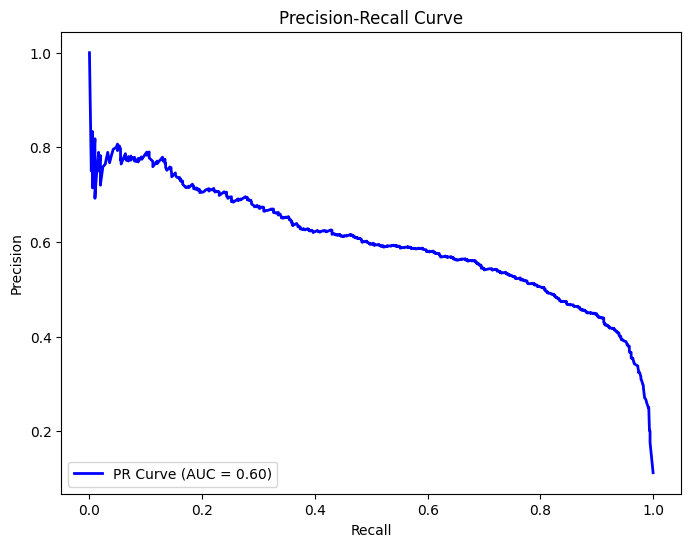

In [317]:
# Precision-Recall Curve
y_pred_prob = random_search.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.show()


##**Error Analysis**

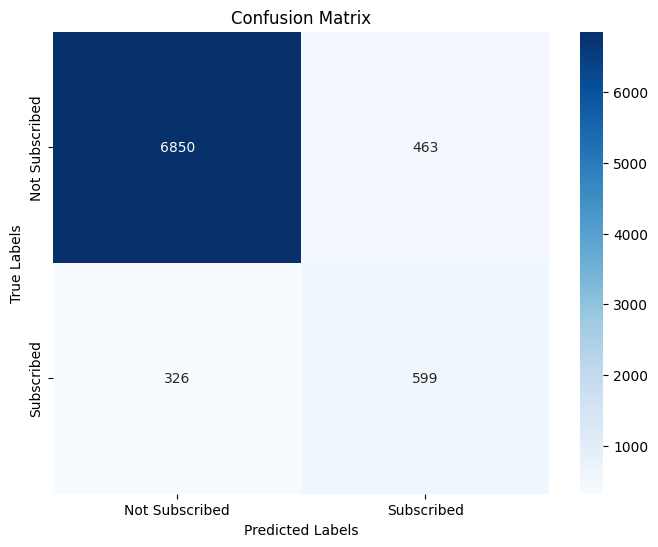

In [318]:
# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=class_names,
        yticklabels=class_names
    )
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Class names
class_names = ['Not Subscribed', 'Subscribed']
# Plot the confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred), class_names)

Error Rate by Class:
True_Label
0    0.063312
1    0.352432
Name: Misclassified, dtype: float64


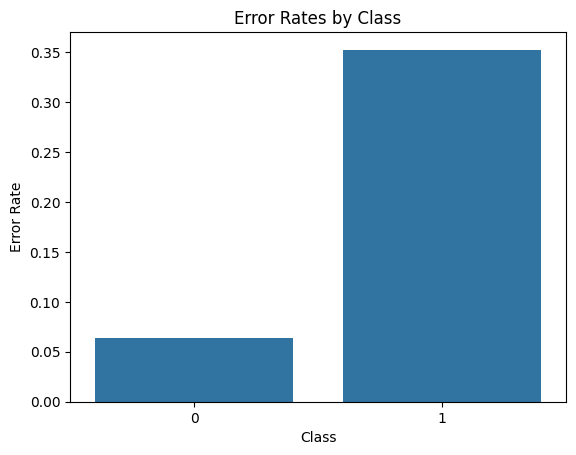

In [319]:
# Create a DataFrame to combine test data, true labels, and predictions
results = X_test.copy()
results['True_Label'] = y_test  # Actual values of 'deposit'
results['Predicted_Label'] = y_pred  # Predicted values of 'deposit'

# Identify misclassified samples
results['Misclassified'] = np.where(results['True_Label'] != results['Predicted_Label'], 1, 0)

# Error rate by class
class_errors = results.groupby('True_Label')['Misclassified'].mean()
print("Error Rate by Class:")
print(class_errors)

# Plot error rates by class
sns.barplot(x=class_errors.index, y=class_errors.values)
plt.title("Error Rates by Class")
plt.ylabel("Error Rate")
plt.xlabel("Class")
plt.show()


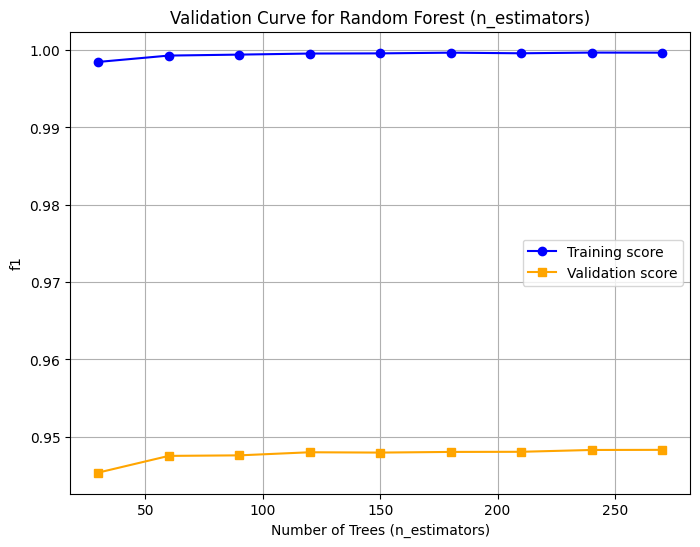

In [321]:
from sklearn.model_selection import validation_curve
# Validation Curve for 'n_estimators'
param_range = np.arange(30, 300, 30)  # Range of n_estimators
train_scores, val_scores = validation_curve(
    RandomForestClassifier(random_state=42, criterion='gini', **random_search.best_params_),
    X_train_res,
    y_train_res,
    param_name="n_estimators",
    param_range=param_range,
    scoring="f1",
    cv=3,
    n_jobs=-1
)

# Calculate Mean and Standard Deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the Validation Curve
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, label="Training score", color="blue", marker="o")
plt.plot(param_range, val_mean, label="Validation score", color="orange", marker="s")

# Formatting
plt.title("Validation Curve for Random Forest (n_estimators)")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("f1")
plt.legend(loc="best")
plt.grid()
plt.show()